This is adaptation and extension of one of the 100 recipes of the IPython Cookbook.

[IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).

A good deal of material has been added to make this suitable for an introductory course.

## Support Vector Machines as classifiers

Let's do some imports.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import GridSearchCV as gs
import sklearn.svm as svm
import matplotlib as mpl
import matplotlib.pyplot as plt

We generate 2D points and assign a binary label according to a linear operation on the coordinates.

In [3]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

The label is True ("positive") if the sum of the two corrdinates is greater than 1; otherwise False.  This is an easy linear problem.

In [4]:
print(X.shape, X[0,0], X[0,1])
print(y[0])

(200, 2) -1.009817521497578 0.4410120851828022
False


The values of the coordinates for the first item X[0,:] are shown, as well as the label, computed by the rule given above,

We now fit a linear **Support Vector Classifier** (SVC). This classifier tries to find a line (a line here, more generally a hyperplane) that separates the True labels from the False labels.  Otherwise put, we train the classifier.
The output of training is a decision function that tells us how close to the line we are (close to the boundary means a low-confidence decision).  Positive decision values mean True, Negative decision values mean False.

In [5]:
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC()

For visualization purposes only (specifically, to use the contour plot below), 
we manipulate the data into a "mesh grid"
shape.  We're going to plot decisions for 250000 points in a 250x250 rectangle.
To do that we'll cast the decision results in the same 250x250 meshgrid shape.

In [6]:
# We generate a 1D point sequence x0 of 500 pts in the interval [-3,3 ] on the x-axis 
# and make xx: a 2D 500x500 grid each of whose rows is a copy of x0. 
# yy = xx.T
# The meshgrid is x0 copied 500 times through the interval  [-3,3 ] on the y-axis: total 250,000 pts
# We return the 250,000 x-coordinates and 250,000 y-coordinates
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# Flatten the meshgrid so the decision function can operate on the points in it
Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Put the results back in meshgrid form.
Z = Z.reshape(xx.shape)

In [7]:
print(xx.shape,Z.shape)
print('Four sample points in the grid, first row the x-ordinates, second row the y')

# In the first column of the mesh x is always -3, increases with increasing column index
print(f'{xx[0,0]: 2.3f}, {xx[1,0]: 2.3f}, {xx[0,1]: 2.3f}, {xx[1,1]: 2.3f}')
print(f'{yy[0,0]: 2.3f}, {yy[1,0]: 2.3f}, {yy[0,1]: 2.3f}, {yy[1,1]: 2.3f}')
print()
print('Now the value of the decision function for those points.  It will be a high positive number for high-confidence positive decisions.')
print('It will have a low absolute value (near 0) for low-confidence decisions.')
print('It will change each time you run this notebook, because a new set of random points is chosen on each run.')
print()
print(f'{Z[0,0]: 2.3f}, {Z[0,1]: 2.3f}, {Z[1,0]: 2.3f}, {Z[1,1]: 2.3f}')
print()
print('The real shape of the data in table form is 250000 2 D points, a 250000x2 array')
print(np.c_[xx.ravel(),yy.ravel()].shape)

(500, 500) (500, 500)
Four sample points in the grid, first row the x-ordinates, second row the y
-3.000, -3.000, -2.988, -2.988
-3.000, -2.988, -3.000, -2.988

Now the value of the decision function for those points.  It will be a high positive number for high-confidence positive decisions.
It will have a low absolute value (near 0) for low-confidence decisions.
It will change each time you run this notebook, because a new set of random points is chosen on each run.

-15.329, -15.303, -15.302, -15.276

The real shape of the data in table form is 250000 2 D points, a 250000x2 array
(250000, 2)


We define a function that displays the boundaries and decision function of a trained classifier.  The `scatter` function displays our points on the 2D grid we defined.  We show the regions of the grid where the decision surface `Z` has the highest values in dark blue with `imshow`, and we show the place where `Z` is 0 with the `contour` function, instructing it to draw a black line along the pointss where `z=0`.  The `scatter` function assigns a color to points as well.  Those for which the class value (`y`) is 1 are dark; those with class value 0 are light (open circles).  We draw dashed axis lies with the two `axhline` and `axvline` commands.

In [8]:
# This function takes a trained SVM estimator as input.
def plot_decision_function(est, X0, y, confidence_plot = False, figside=6,bounds=3,
                           kernel=None):
    xx, yy = np.meshgrid(np.linspace(-bounds, bounds, 500),
                         np.linspace(-bounds, bounds, 500))
    # We evaluate the decision function on the grid.
    X = np.c_[xx.ravel(), yy.ravel()]
    if kernel is not None:
        #X = np.c_[X, third_dimension(X)]
        X = kernel(X)
    Z = est.decision_function(X).reshape(xx.shape)
    cmap = plt.cm.Blues
    # This works too
    #cmap = plt.cm.Reds
    # We display the decision function on the grid.
    plt.figure(figsize=(figside,figside));
    toshow = np.abs(Z) if confidence_plot else Z
    # This will color 250K pts according to Z-value
    plt.imshow(toshow,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap);
    # This will display the decision boundary: the boundary where Z = 0  
    plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                colors='k');
    # y is a Boolean array the same size as X.shape[0], giving the class of all plotted pts
    # All point colors c fall in the interval .5<=c<=1.0 on the blue colormap. 
    # We boost color vals to color the true points darker.
    plt.scatter(X0[:, 0], X0[:, 1], s=30, c=.5+.5*y, lw=1, 
                cmap=plt.cm.Reds, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--');
    plt.axvline(0, color='k', ls='--');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);

5) Let's take a look at the classification results with the linear SVC.

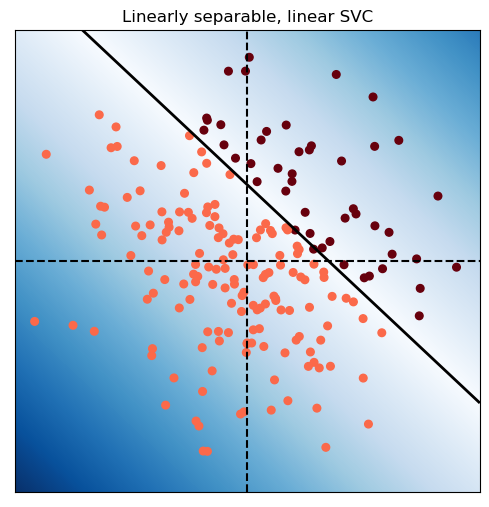

In [9]:
plot_decision_function(est, X, y, confidence_plot = True);
plt.title("Linearly separable, linear SVC");

The linear SVC tried to separate the points with a line and it did a pretty good job.

## A margin

Next we'll take our super-easy classification problem and make it even easier by inserting more distance between the positve and negative instances.  Let's modify our point locations
so that there is a "no man's land" between the positive and negative points.  This demonstrates that the idea of an SVM is not just drawing any linear separator but drawing the one that "maximizes" the "margin" (distance) between the separating plane and the nearest examples.

In the two cells we create a new dataset in which the Xvalues of just the positive points have been increased by 1.

In [10]:
F = np.zeros(len(y),dtype=bool)
print(F[:4])

[False False False False]


How `np.where` works:

In [11]:
a = np.arange(10)
print(a)
np.where(a < 5, a, 10*a)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [12]:
Y = np.c_[y,F]
# Add 1 where y is True
NX = np.where(Y,X+1,X)
# Convert Y according to SVM convention 1 -> 1, 0 -> -1
# This is purely for simplifying explanations.  sklearn does not require this.
y = np.where(y,y,-1)

In [13]:
y[:20]

array([-1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
        1, -1, -1])

1.  We made a new `Y` to use as a condition for creating new data. The second column of Y is always `False`, the first is the same as `y`.

2.  We make new X-data `NX`; leave the Y-coordinate (second column) as before.  Add 1 to the coordinates of the X's that were `True`.  Save the other X-values as before.

The combined effect is to add 1 to the x-coordinates of the X's on the positive side of the decision boundary, while leaving their y-coordinates unchanged. So all the X's on the positive side of the decision boundary are moved away from it, creating a separation.

In [14]:
y[:5]

array([-1, -1, -1, -1, -1])

In [15]:
print(X[:5])
print()
print(NX[:5])

[[-1.00981752  0.44101209]
 [ 1.09373113 -0.45765412]
 [-1.45932104  1.30405988]
 [-0.8827298   0.39430932]
 [-1.06577127 -0.23959665]]

[[-1.00981752  0.44101209]
 [ 1.09373113 -0.45765412]
 [-1.45932104  1.30405988]
 [-0.8827298   0.39430932]
 [-1.06577127 -0.23959665]]


The positive negative rule will be the same, the label is True ("positive") if the sum of the two ORIGINAL coordinates is greater than 1; otherwise False.  So we use the same y.

We now fit a linear **Support Vector Classifier** (SVC) to the modified data.

In [77]:
est = svm.LinearSVC(random_state=44)
est.fit(NX, y)

LinearSVC(random_state=44)

### Whe the SVM Classifier lerans

We now define a slightly modified function that displays the boundaries and decision function of a trained classifier, as before, and adds dashed lines to show the margin between the
separating line and the nearest data points.

In [78]:
def new_plot_decision_function(est, X0, y, confidence_plot = False, figside=6,bounds=3):
    """
    w is a vector perpendicular to L which satisfies 
    w \cdot P = -b
    for any point on L (since w is perpendicular to L)
    
    Take P to be  the y intercept (0,y0).  Then

    (w1,w2) \cdot (0,y0) = -b
    w2 \cdot y0 = -b
    y0 = -b/w2
    """
    xx, yy = np.meshgrid(np.linspace(-bounds, bounds, 500),
                         np.linspace(-bounds, bounds, 500))
    global w1, w2, y0,slope
    # We evaluate the decision function on the grid
    # flattening the grid out first
    X = np.c_[xx.ravel(), yy.ravel()]
    Z = est.decision_function(X)
    # put Z back into meshgrid form, for ploitting
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    # We display the decision function on the grid.
    plt.figure(figsize=(figside,figside));
    toshow = np.abs(Z) if confidence_plot else Z
    plt.imshow(toshow,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap);            
    # We display the boundary where Z = 0, The width of the margin is always normalized to be 1.
    plt.contour(xx, yy, Z, levels=[-.5,0,.5], linewidths=2,
                colors='k', linestyles=['dashed','solid','dashed'])
    
    # All point colors c fall in the interval .5<=c<=1.0 on the blue colormap. We color the true points darker blue.
    plt.scatter(X0[:, 0], X0[:, 1], s=30, c=0+.5*y, lw=1, 
                cmap=cmap, vmin=0, vmax=1);
    w = est.coef_[0]
    w1,w2 = w
    L_slope = -w1/w2
    inverse_L_slope = -w2/w1
    
     
    def L_prime (x):
        """
        points of line parallel to L through origin
        """
        return L_slope* x

    def inverse_L_prime (y):
        """
        points of L^{-1}.  Given y on L returns the x s/t L(x) = y
        """
        return inverse_L_slope * y
    
    # Draw L'
    y_L_prime_m,  y_L_prime = L_prime(-bounds), L_prime(bounds)
    plt.plot(np.array([inverse_L_prime(y_L_prime_m),inverse_L_prime(y_L_prime)]),
             np.array([y_L_prime_m, y_L_prime]),label="L'",color="g")
    
    if est.fit_intercept:
        b = est.intercept_[0]
    else:
        # The data has been centered
        b = est.intercept_

    def L (x):
        """
        Note that the actual y interceot of L is -b/w2 (NOT b)
        """
        return (L_slope * x) - b/w2
    
    def inverse_L (y):
        return inverse_L_slope * (y + b/w2)
    
    y_L_m,  y_L = L(-bounds), L(bounds)
    
    # Draw L
    plt.plot(np.array([inverse_L(y_L_m),inverse_L(y_L)]),
             np.array([y_L_m, y_L]),label="L",c="y")
    
    # Draw w
    plt.arrow(0,0,dx=w1,dy=w2,color="r",head_width=.1,label="w")
    # Draw the point y0
    plt.scatter([0],[-b/w2],color="r", label="y0")
    plt.axhline(0, color='k', ls=':');
    plt.axvline(0, color='k', ls=':');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);
    plt.legend()

Let's take a look at the classification results with the linear SVC.

Text(0.5, 1.0, 'Separable with margin, linear SVC')

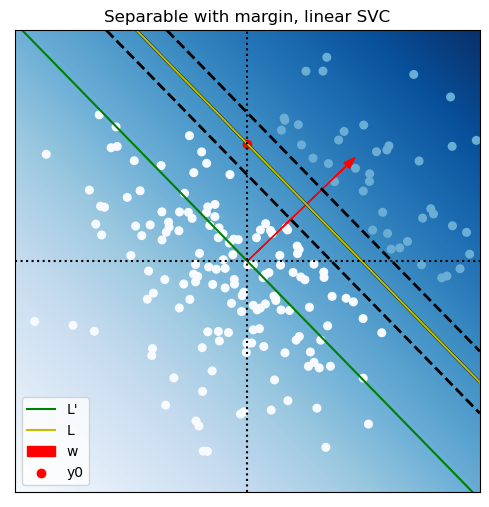

In [79]:
new_plot_decision_function(est, NX, y)
plt.title("Separable with margin, linear SVC")

In the picture above, the yellow line labeled L separates the positive training data points (light blue)
from the negative data points.   The intercept of L
with the $y$ axis is labeled $y_0$, The dashed lines on either side
of L represent the distance from L to the nearest data points.  The
points (or vectors) lying on the dashed lines are called the **support vectors**.  The region between the 
two dashed lines is called the **margin**. In support vector machines, L is the unique
linear separator that **maximizes the margin**. 

The plot also shows a red arrow $\vec{w_{}}$ 
which is perpendicular to L.  Known as the **weight vector**, $\vec{w_{}}$ 
is what the SVM learner learns during training;
$\vec{w_{}}$ defines L through the following relationship:

$$
\begin{array}[t]{llcl}
(1) & \vec{w_{}} \cdot \vec{x_{}} & =& -b
\end{array}
$$

That  is, if $\vec{x}$ is a point on L, its dot product with $\vec{w_{}}$ is a constant $-b$,
also learned during training.

To see how (1) defines a line, let $\vec{w_{}} = (w_1,w_2)$, and $\vec{x}=(x_1,x_2)$.  Then from (1) we get:

$$
\begin{array}[t]{llcl}
(2)& -b & =& (w_1\cdot x_{1}) +  (w_2\cdot x_{2})\\
   & x_{2} & =&  \frac{-w_1}{w_2} \cdot x_{1} + \frac{-b}{w_2}\\
\end{array}
$$

So the line L that (1) defines has slope $-w_1/w_2$ and intercept $-b/w_2$,
which means that the point labeled $y_0$ in the picture is $(0, -b/w_2)$.
The slope of L means that it is perpendicular to $\vec{w_{}}$.

Implementation note.  The attribute of the SVM estimator `est` that corresponds to $b$
in this discussion is found at `est.intercept_`.  Despite this name, it is
**not** the same as the y-intercept of Line L, as this discussion makes clear.
The choice of this implementation-internal name is motivated by details of the scikit learn
interface and standard machine-learning terminology.

### Distance of a point from L

The distance of any point $\vec{x_{i}}$ from L is the length $r_{i}$ of  the vector from $\vec{x_{i}}$ to  L, which points in the same direction as $\vec{w}$, So calling that vector $\vec{l}$, we can write:

$$
\begin{array}[t]{lcl}
\vec{l} &= & r_{i} \frac{\vec{w_{}}}{\vert \vec{w_{}}\vert},\\
\end{array}
$$

Therefore

$$
\vec{p_{i}} = \vec{x_{i}} - \vec{l}
$$

is a point on L; and therefore

$$
\vec{p_{i}} \cdot \vec{w_{} } + b = 0.
$$

Substituting:

$$
(\vec{x_{i}} -   r_{i} \frac{\vec{w_{}}}{\vert\vec{w_{}}\vert}) \cdot \vec{w_{}} + b = 0.
$$

and solving for $r_{i}$, we get a provisional expression for the geometric distance:

$$
r_{i} = \frac{\vec{w_{}}\cdot \vec{x_{i}} + b}{\vert\vec{w_{}}\vert},
$$

Now by (1), $\vec{w_{}}\cdot \vec{x_{i}} + b=0$ precisely when $\vec{x_{i}}$ is on L,
which is what we want.  What about otherwise?
When $\vec{w_{}}\cdot \vec{x_{i}} + b$ is positive, $\vec{x_{i}}$ is on one side of the line.
When it is negative $\vec{x_{i}}$ is on the other side of the line.
Hence with this definition, $r_{i}$ may be negative, because $\vec{w_{}}\cdot \vec{x_{i}} + b$ will be
negative for one class.  So we may use $y_{i}$,
the class of example $x_{i}$, to guarantee a positive value:

$$
(4) \; r_{i} = y_{i}\frac{\vec{w_{}}\cdot \vec{x_{i}} +b}{\vert\vec{w_{}}\vert} 
$$

The assumption  is that $y_{i}= 1$ for positive class instances and -1 for negative class instances.  We see that $r_{i}$, the distance of $\vec{x_{i}}$ from L,
is proportional to $y_{i} \vec{w_{}}\cdot \vec{x_{i}} + b$.

### Class assignment rule

Now to see how we can use (4) to classify, let's rewrite (1):

$$
\begin{array}[t]{llcl}
(1') & \vec{w_{}} \cdot \vec{x_{}} + b & =& 0
\end{array}
$$

and let's define a **decision function** $d$:

$$
(5) \;\; d(X) =  \vec{w_{}} \cdot \vec{x_{}} + b 
$$

so as to rewrite (4) as:

$$
(4')  \;\; r_{i} = y_{i}\frac{d(\vec{x}_{i})}{ \vert\vec{w_{}}\vert}.
$$

By (1'),  $d(\vec{x_{i}})=0$ precisely when $\vec{x_{i}}$ is on L. 
We saw above that when $d(\vec{x_{i}})$ is positive, $\vec{x_{i}}$ is on one side of the line.
When it is negative $\vec{x_{i}}$ is on the other side of the line.
Hence we can write the class assigned by the classifier to $\vec{x_{i}}$ ($\hat{y_{i}}$) as:

$$
\begin{array}[t]{lclll}
(5) & \hat{y_{i}} = \text{sign}(d(\vec{x_{i}})) & = & \text{sign}(\vec{w_{}} \cdot \vec{x_{i}} + b)
\end{array}
$$

By definition, the sign function returns 1 for positive
values and -1 for negative. 

### How to maximize the margin

In SVM terminology, the two quantities $r_{i}$  and 
$y_{i} (\vec{w_{}}\cdot \vec{x_{i}} +b)$ are
called **margins** of the point $\vec{x_{i}}$; 
$r_{i}$ is called the **geometric margin**
of $\vec{x_{i}}$,
and $y_{i} (\vec{w_{}}\cdot \vec{x_{i}} +b)$ is called the **functional margin** of $\vec{x}_{i}$.

One way to define learning goal for an SVM is that it 
seeks the line that maximizes the **classifier's
geometric margin**. The classifier's geometric margin GM is defined to be

$$
\text{GM} = 2 \, r_{i} = 2 \,\frac{y_{i} (\vec{w_{}}\cdot \vec{x_{i}} + b)}{\vert\vec{w_{}}\vert},
$$

where $x_{i}$ is the point with minimal $r_{i}$.  GM, then, is the width of the
region between the dashed lines in the figure.  

A useful property of equation (1) is that
it does not settle the scale of $\vec{w_{}}$. Doubling  both $\vec{w_{}}$ and $b$ amounts
to multiplying both sides of (1) by 2; the resulting
equation describes the same line.  Thus, any separator L may be described with
$\vec{w_{}}$ chosen so as to make the
minimal value for $y_{i} \,(\vec{w_{}}\cdot \vec{x_{i}} + b)$ equal to 1.  In other words, for
all training points $\vec{x_{i}}$:

$$
y_{i} (\vec{w_{}}\cdot \vec{x_{i}} + b) \geq 1
$$

If we require that there be at least one vector with functional margin 1 then

$$
GM = 2/\vert\vec{w_{}}\vert.
$$

So the learning problem is to find $w$ and $b$ such that

   1.  $2/\vert\vec{w_{}}\vert$ is maximized; and
   2.  for all $x_{i},\,y_{i}$:   $y_{i} (\vec{w_{}}\cdot \vec{x_{i}} + b) \geq 1$,
       with equality for at least one vector.
   
This falls into a well understood class of optimization problems, optimizing a quadratic 
function ($2/\vert\vec{w_{}}\vert$) subject to constraints.

### The confidence score view

We can call the 
functional margin of a point a **confidence score** because it quantifies how sure the classifier is of
its decision.  The higher the score the greater the classifier's confidence.

As we just showed, for any point $\vec{x}_{i}$, $d(\vec{x}_{i})$  is proportional to the signed distance of the point from L. Conversely, the classifications for the support vectors are the minimally confident
classifications.  This then is the rationale for defining L to be the line maximizes the geometric margin of
the classifier. To maximize the geometric margin of the classifier
means maximizing the geometric margin of the support vectors. 
The greater the geometric margin of the support vectors, the greater the  confidence level
for all the classifier's decisions.

Let's demonstrate this on the example data, including the two points with the highest
positive and lowest negative values for $d$, which are the two points
we most confidently classify as positive and negative.

The **weight vector** ($w$) is in `est.coef_` and the intercept ($b$) is in `est.intercept_`:

In [80]:
def decision_function(x,w=None,b=None):
    if w is None or b is None:
        w, b = est.coef_[0],est.intercept_[0]
    return w.dot(x) + b

In [81]:
# Indexes of first positive/negative class points
pos_i, neg_i = y.argmax(),y.argmin()

In [82]:
decision_function(NX[pos_i])

2.197226508736727

This agrees with the value of the estimator's (learned) decision function (as it should):

In [83]:
est.decision_function(NX[pos_i:pos_i+1])

array([2.19722651])

The two extreme (highest functional margin) points in our data:

In [84]:
D = est.decision_function(NX)
print(D.argmax(),D.argmin())

82 136


A support vector (or,  a point with the minimum functional margin).

In [85]:
min_idx = (y*D).argmin()

Its functional margin.  Note that the scikit learn implementation does not need to impose the constraint that the minimum is 1.

In [86]:
(y[min_idx] * D[min_idx])

0.6790280676382658

In [102]:
# Length of the weight vector w
w_norm = np.linalg.norm(est.coef_[0])
yD = y*D
print("        Cls  Functional Margin   Geometric Margin",end="\n\n")

for i in [neg_i, pos_i, yD.argmax(), yD.argmin()]:
    decision_score = decision_function(NX[i])
    f_marg =  y[i] * decision_score
    dist = f_marg/w_norm
    print(f"{i: >3}     {y[i]: d}    {f_marg: 8.4f}             {dist: .4f}")

        Cls  Functional Margin   Geometric Margin

  0     -1      2.6368              1.4781
  5      1      2.1972              1.2317
136     -1      6.3787              3.5757
141      1      0.6790              0.3806


Below we show the margins for the same 4 points,
normalizing all functional margins to be greater than or equal to 1,
and rescaling $\vec{w_{}}$ and $b$ by the same factor. Note that the geometric margins are unchanged.  Rescaling w and b does not affect the distances they are used to compute.

In [101]:
# functional margin for support vector
fm_min = D[(y*D).argmin()]
newW,newB = est.coef_[0]/fm_min, est.intercept_[0]/fm_min
# Length of the new weight vector (= np.linalg.norm(newW))
new_w_norm = w_norm/fm_min 
 
print("        Cls  Functional Margin   Geometric Margin",end="\n\n")

for i in [neg_i, pos_i, yD.argmax(), yD.argmin()]:
    decision_score = decision_function(NX[i],newW,newB)
    f_marg = y[i] * decision_score
    dist = f_marg/new_w_norm  # same as the old dist, both numerator and denominator normed.
    print(f"{i: >3}     {y[i]: d}    {f_marg: 8.4f}             {dist: .4f}")

        Cls  Functional Margin   Geometric Margin

  0     -1      3.8831              1.4781
  5      1      3.2358              1.2317
136     -1      9.3938              3.5757
141      1      1.0000              0.3806


### Further reading

See [Stack overflow discussion on SVMs](https://stackoverflow.com/questions/11030253/decision-values-in-libsvm#11041503) and [Computing the distances in SVMs](https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary#32077408).  For a more systematic discussion
of SVMs, including a description of the learning algorithm, see Chapter 15 of [Manning, Raghavan and Schuetze's An Introduction to Information Retrieval.](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)

## A non separable example

We now replace the former labels with labels assigned by the **IFF** function. The name name IFF comes from propositional logic.  A proposition that requires $p$ and $q$ to have the same truth value is

$$p \longleftrightarrow q.$$

This is read "$p$ if and only if $q$" (abbreviated "$p$ iff $q$").  

We call the function defined below the
IFF function because a point's label is 1 if the coordinates have the same **signs**. This classification is not linearly separable. Therefore, a linear SVC fails completely.

During training, we may get warnings from sklearn.  It may have to terminate
without having found a separator that's within the tolerances it's targeting.

0.54


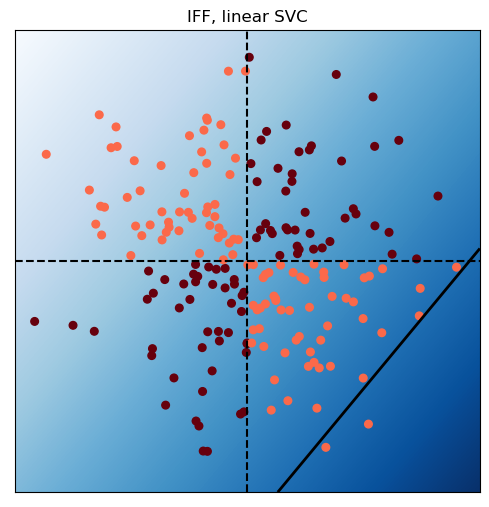

In [107]:
# XOR the x or y coord must be positive, but not both
# y2 = (X[:, 0] * X[:, 1]) > 0
# IFF
y_iff = (X[:, 0] * X[:, 1]) > 0

# We train the classifier. allow a model with some misclassified points.
# 'C' np.logspace(-3., 3., 10)})
est = svm.LinearSVC(random_state=42) 
est.fit(X, y_iff)

# Plot the decision function.
plot_decision_function(est,X, y_iff)
plt.title("IFF, linear SVC")
print(est.score(X,y_iff))

Hmm.  .54 is better than random chance.  Is that just luck?

Or does this clasifier know something?

###  Cross-validation

Different training-test splits will give differemt evaluation results, essentially
because some test sets, however randomly chosen, are harder.

The solution is **n-way cross validation**. Take, for instance,  five-way cross-validation.  Do five training-test splits of the same  data. Each split partitions the entire data set into training and test parts.
Take the mean value of the five evaluations as your final reported score.
But what if some particularly hard subset of the data gets left out in all five splits? 
We won't let that happen.  Start by splitting the data into 5 sets of equal size; on each of the 5 evaluations
leave out of the five parts to use as test data.  So 5-way cross validation means training on
80% of the data, and testing on 20%.  Since each validation run tests on a different 20%,
every item is used as a test item on some validation run.

In [108]:
# We'll do cross validation on the training data, and take mean()
# cv_res is a dict
est = svm.LinearSVC(random_state=43) 
# cv=5 Number of groups to split the data into
cv_res = cv(est, X, y_iff,cv=10)
#cv_res = cv(est, X, y2)
print(f"Score: {cv_res['test_score'].mean():.1f}")

Score: 0.5


As expected with this linearly non separable problem, the mean score is right at random chance, nn So
previous score score **was** due to luck.

Some of the parameters of our cross validation.

In [109]:
print(cv_res.keys())
# This is cross validation on 10 different runs. Here are the 10 test scores.
print(cv_res['test_score'])
# Maybe a little worse than random chance, not sure why...
print(cv_res['test_score'].mean())

dict_keys(['fit_time', 'score_time', 'test_score'])
[0.6  0.5  0.45 0.35 0.55 0.55 0.6  0.55 0.4  0.55]
0.51


### Grid search plus cross-validation

Classifiers like `SVC` have various parameters that can be set in various ways. 
The scikit learn SVC is a support vector machine model that
uses kernels; by default it uses the RBF kernel
discussed below.  It has two **hyperparameters** `gamma` and `C` that can
hav e a huge impact on performance.  From the scikit learn docs:

1. Intuitively, the `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
2. The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

Usually you won't have a clue what value suits your problem best.
Also, the values of different parameters will interact: Value  0
for parameter 1 and value 0 of parameter 2 may bomb when you test 
them individually, but provide a big boost
in performance when combined.

One idea is to use a grid search.  Check out all possible combinations
of values for a set of parameters.  This is called the value
grid for this set of parameters.  How do we check each grid setting?  We check
our score on a test set!  But remember that a score may 
be due to chance.  So we do cross-validation while doing grid search.
Each grid-evaluation score is arrived at by cross-validation.

In [130]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, ShuffleSplit
#  The SVC SVM uses the radial basis kernel by default
from sklearn.svm import SVC

###  
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
# This option is not relevant here and is included for completeness
# The folds are made by preserving the percentage of samples for each class.
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

newX = X
grid.fit(newX, y_iff)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [131]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1000.0, 'gamma': 0.1} with a score of 0.99


The grid search classifier used a nonlinear kernel (called RBF).  More on that below.

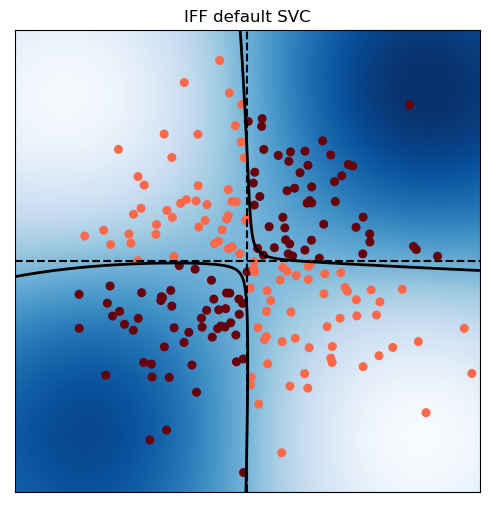

In [132]:
plot_decision_function(grid,newX,y_iff);
plt.title("IFF default SVC");

#### A note on our use of logspace in the grid search

The `np.logspace` function  is is the logarithmic equivalent of `np.linspace`.  We 
populate the interval from `start` to `stop`
with `num` evenly spaced values and then construct the array resulting
from raising `base` to those values.

In [87]:
start,stop,num = -3, 3, 10
base= 10

y = np.linspace(start, stop, num=num)
print(y)
np.power(base, y)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

In [78]:
np.logspace(-3., 3., 10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

For both features, our grid search chose values from about the middle of the two log ranges
we used:

In [79]:
gamma_range

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [98]:
print(f"{grid.best_params_['gamma']:1.1e}")

1.0e-02


In [80]:
C_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [85]:
print(f"{grid.best_params_['C']:0.1e}")

1.0e+05


### The kernel trick

The IFF problem was solved in a surprise twist by the `SVC` implementation of the SVM.
Clearly we resorted to a classifier that found a nonlinear decision boundary.  
Yet it was still an SVM exactly as we explained above; that is,
it was still a linear classifier.  How did that work?  Well it worked much
like the nonlinear regression models we saw earlier.  It effectively transformed
the data into a higher dimensional space, where it was able to find
a hyperplane that separated the data.  And when we plotted the decision boundary
back in the original space, it was curvy.  We'll try to provide a useful
visualization below.  But let's explore some issues with this strategy 
as just described.

The problem with such dimensionality-increasing transformations is that
they are costly, especially with data that already has significant dimensionality.
Such transformations can sometimes
be made more tractable by using **kernels**,
functions that find the dot products of the transformed data
with computations performed in the original space.

As we'll illustrate below, kernels are appealing because they provide  a way of representing data that has been 
transformed into a higher-dimensional space without explicitly representing the transformation $f$.
Many classification learning algorithms (SVMs are among them) 
can learn the same linear separator using either a kernel
or an explicit higher dimensional representation of $f$ (the two equivalent learning problems
are **duals** of each other).

As an example, let's say that there is feature function ${\mathbf f}$ that
provides a representation of the 2D data in this notebook in 3D, for example.

$$
f: (x,y) \mapsto (x,\,y,\,xy)
$$

Then the Kernel is a function K of two data points $X_{1}$ and $X_{2}$ that 
computes the dot product of their representation under $f$.

$$
\text{K}({X_1},\,X_{2}) = f(X_{1}) \cdot f(X_{2}) = x_{1}x_{2} + y_{1}y_{2} + x_{1}y_{1}x_{2}y_{2}
$$

How does this help with training a classifier?  
Training a  linear classifier means searching for a sequence (or vector) of feature
weights that solve the classification problem.  Writing $c(X)$ as the class assigned to 
example $X$, and $w$ as the vector of feature weights,
the class can be written as the sign of the dot product of the features weights with $X$:

$$(a)\; c(X) = \text{sign}(w\cdot f(X))$$.

What makes the kernel trick useful in a learning setting is  that  $w$ can be decomposed into a weighted sum of $n$ of the transformed examples in the data $(X_{1},\,\dots,\,X_{n})$; for our current purposes it doesn't matter which $n$
examples are used, but
in a support vector machine these are usually chosen from the so-called **support vectors** :

$$ (b)\; w = \sum_{k=1}^{n} s_{k} \, f(X_{k})$$

Then the same classifier can be formulated as:

$$ (c)\; c(X) = \text{sign}(\sum_{k=1}^{n} s_{k} K(X_{k}, X)) $$

>A note for the more mathematically inclined: Given equivalence (b), Using the $n$ support vectors and their weights we have:

>$$(d)\;  c(X) = \begin{array}[t]{l}\text{sign}(\,\sum_{k=1}^{n} s_{k} K(X_{k}, X)\,)\\ \text{sign}(\,\sum_{k=1}^{n} s_{k} f(X_{k}) \cdot f(X)\,) \\ \text{sign}(\,(\,\sum_{k=1}^{n} s_{k} f(X_{k})\,)\cdot f(X)\,)\\ \text{sign}(w\cdot f(X)) \end{array} $$

Using formulation (a), the learner works entirely with the transformed data $f(X)$ and learns feature weights for the transformed (possibly higher dimensional) space.  Using formulation (c), the learner works in the original feature space of $X$ find $n$ support vectors and their weights.   Formulation (c) may be more efficient when $f$ has nasty  computational properties or when there are many features and few examples.

Using formulation (c)  is called the kernel trick. It is a trick because the transformation $f$ is implicit;
classification applies K to support vectors and  $X$, all of which are untransformed.

###  Example (for the mathematically inclined): Using polynomial kernel on IFF problem

As an example consider one of the kernels the scikit-learn `SVC` (Support-Vector Classifier) supports,
the **polynomial kernel**; for our 2D data the polynomial kernel function K with degree = 2 looks like this:

$$
\begin{array}[t]{lcl}
K(X_{1},X_{2}) &=& x_{1}^{2} x_{2}^{2} + 2x_{1} x_{2} y_{1} y_{2} + y_{1}^{2} y_{2}^{2}\\
               &=& (x_{1}^{2}, \sqrt{2}\, x_{1} y_{1}, y_{1}^{2}) \cdot (x_{2}^{2}, \sqrt{2}\, x_{2} y_{2}, y_{2}^{2})
\end{array}
$$

So the feature transformation corresponding to this kernel is:

$$
f: (x,y) \mapsto (x^{2}, \,\sqrt{2}\, x y, \, y^{2}).
$$

This particular kernel is computationally quite attractive because K is just the square of the dot product:

$$
K(X_{1},X_{2}) = (x_{1}x_{2} + y_{1}y_{2})^{2} = (X_{1}\cdot X_{2})^{2}.
$$

So the key characteristics of the kernel trick are very clear.
The transformation $f$ maps a 2D representation into a nonlinear 3D representation (involving 
multiplying feature values $x$ and $y$ and $\sqrt{2}$); while K is just the square of the dot product of 
two 2D feature vectors.

Transformation $f$ provides a very simple linear separator for the 2D IFF problem,
whether we use the kernel trick or not.
Note that feature 2 multiplies feature values $x$ and  $y$; $xy$ will be positive for positive
examples and negative for negative examples, so the following $w$ defines a successful
separator:

$$w = (0,1,0).$$

Working in the 3d feature space of $f$, we classify $(-1,1)$, a negative IFF instance,
as follows:

$$
\begin{array}[t]{lll}
f((-1,\,1)) & = &(1,-\sqrt{2}, 1)\\
\text{sign}(w\cdot f((-1,\,1))) &=& \text{sign}((0,\,1,\,0) \cdot (1,\,-\sqrt{2},\, 1) )\\
                              &=& \text{sign}(-\sqrt{2})\\
                              &=& -1
\end{array}
$$

So this is correctly classified as a negative example.  Next we try positive IFF
instance (-1, -1).

$$
\begin{array}[t]{lll}
f((-1,\,-1)) & = &(1,\, \sqrt{2}, \,1)\\
\text{sign}(w\cdot f((-1,1))) &=& \text{sign}((0,\,1,\,0) \cdot (1,\,\sqrt{2},\, 1) )\\
                              &=& \text{sign}(\sqrt{2})\\
                              &=& 1
\end{array}
$$

And this is correctly classified as a positive example.

Now let's classify the same two examples using the kernel K.
Let's choose $\mathbf{(1,1)}$ and $\mathbf{(1,-1)}$ as our support vectors
(How did we arrive at that choice? The answer is that any linearly independent
vectors would work for our purposes here).  Next we guess at appropriate support weights $s_1$ and $s_2$
(we don't actually have to guess but we omit the computation here):

$$
\begin{array}[t]{l|ccc}
      & v_{i} &  f(v_{i}) & s_{i} \\
      \hline
v_{1} & \mathbf{(1,\,1)} & (1, \,\sqrt{2},\, 1) & \frac{\sqrt{2}}{4}\\
v_{2} & \mathbf{(1,\,-1)} & (1,\, -\sqrt{2}, \,1) & -\frac{\sqrt{2}}{4}\\
\end{array}
$$

Then the weighted sum of the 3D versions of our example vectors
sums to $w$, as desired:

$$
\begin{array}[t]{lll}
w & = & s_{1} f(v_{1})  + s_{2} f(v_{2})\\
  & = & \frac{\sqrt{2}}{4} (1, \sqrt{2}, 1) + - \frac{\sqrt{2}}{4} (1, -\sqrt{2}, 1)  \\
  & = & (\frac{\sqrt{2}}{4}, 1/2, \frac{\sqrt{2}}{4}) + (-\frac{\sqrt{2}}{4}, 1/2, -\frac{\sqrt{2}}{4})  \\
  & = & (0,1,0)
 \end{array}
$$

With the support vectors and their weights in hand, 
we can now apply the Kernel trick to 
classify negative example vector (-1,1)
without using a third dimension (support vectors are in bold):

$$
\begin{array}[t]{lll}
c((-1,1)) &=& \text{sign}(\sum_{k=1}^{n} s_{k} \, K(X_{k}, (-1,1)) \\
          &=& \text{sign}(\sqrt{2}/4 \, (\mathbf{(1,\, 1)} \cdot (-1,\,1))^2 + 
                       -\sqrt{2}/4\, (\mathbf{( 1,\, -1)} \cdot (-1,\,1))^2 )\\
          &=& \text{sign}(\,(\sqrt{2}/4 \cdot 0) + (-\sqrt{2}/4 \cdot (-2)^2 )\,)\\          
          &=& \text{sign}(-\sqrt{2})\\
          &=& -1
\end{array}
$$

So this is again correctly classified as negative. Meanwhile

$$
\begin{array}[t]{lll}
c((-1,\,-1)) &=& \text{sign}(\sum_{k=1}^{n} s_{k} K(X_{k}, (-1,\,-1)) \\
         &=& \text{sign}(\sqrt{2}/4\, (\mathbf{(1,1)} \cdot (-1,\,-1))^2 + 
                   -\sqrt{2}/4\, (\mathbf{(1,\,-1)} \cdot (-1,\,-1))^2 )\\
          &=& \text{sign}(\,(\sqrt{2}/4 \cdot (-2)^2) + (-\sqrt{2}/4 \cdot 0)\,)\\          
          &=& \text{sign}(\sqrt{2})\\
          &=& 1
\end{array}
$$

And this is again correctly classified as positive.

###  Separating the IFF data with the (polynomial)  kernel trick


We have already seen the `SVC` classifier solve the IFF problem (using the RBF kernel
which will be explained below).  In the next two sections we want to compare solving
a classification problem using a transformation and working in the higher dimenbsional
with solving it using the kernel trick. This actually isn't possible using the RBF
kernel (for reason to be laid out below), but it is possible with
a polynomial kernel.

So let's try scikit_learn's polynomial kernel on the IFF problem.  First
we will use the kernel trick.  And then we will solve the same problem
working with the higher dimensional representation.

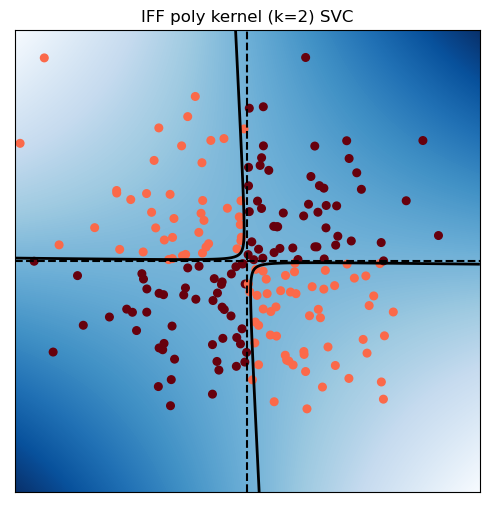

In [432]:

clf = svm.SVC(kernel='poly',degree=2).fit(X,y_iff)
plot_decision_function(clf,X,y_iff);
plt.title("IFF poly kernel (k=2) SVC");

The kernel-aided SVC does a pretty good job at classifying these non-linearly separable points.

### We find the IFF separator without the kernel trick

A new plotting function

In [135]:
# This function takes a trained SVM estimator as input.
def plot_with_mapping(est, X0, y, mapping, confidence_plot = False, figside=6,bounds=3,
                           sk_transformer=False):
    xx, yy = np.meshgrid(np.linspace(-bounds, bounds, 500),
                         np.linspace(-bounds, bounds, 500))
    # We evaluate the decision function on the grid.
    X = np.c_[xx.ravel(), yy.ravel()]
    if sk_transformer:
        newX0 = mapping.fit_transform(X0)
        newX = mapping.transform(X)
    else:
        # Transform data
        newX0 = mapping(X0)
        # Transform points in the plotting mesh
        newX = mapping(X)
    est.fit(newX0,y)
    Z = est.decision_function(newX).reshape(xx.shape)
    cmap = plt.cm.Blues
    # This works too
    #cmap = plt.cm.Reds
    # We display the decision function on the grid.
    plt.figure(figsize=(figside,figside));
    toshow = np.abs(Z) if confidence_plot else Z
    # This will color 250K pts according to Z-value
    plt.imshow(toshow,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap);
    # This will display the decision boundary: the boundary where Z = 0  
    plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                colors='k');
    # y is a Boolean array the same size as X.shape[0], giving the class of all plotted pts
    # All point colors c fall in the interval .5<=c<=1.0 on the blue colormap. 
    # We boost color vals to color the true points darker.
    plt.scatter(X0[:, 0], X0[:, 1], s=30, c=.5+.5*y, lw=1, 
                cmap=plt.cm.Reds, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--');
    plt.axvline(0, color='k', ls='--');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);

Now let's try classifying without the kernel trick simply by passing
the learner the 3D representation given by $f$:

Here is $f$, which maps from a 2D X to a 3D X using the polynomial
feature transformation described in the example above:

$$
f: (x,y) \mapsto (x^{2}, \,\sqrt{2}\, x y, \, y^{2}).
$$

In [133]:
def f (X):
    # The polynomial feature mapping f from our example: "Using polynomial kernel on IFF problem"
    return np.concatenate([X[:,0:1]**2, np.sqrt(2) * X[:,0:1] * X[:,1:2], X[:,1:2]**2], axis=1)

X = np.random.randn(200, 2)

newX = f(X)
## Before and after samples

print('Before')
print(X.shape)
print()
print(X[5:7,:])
print()
print('After')
print(newX.shape)
print()
print(newX[5:7])


Before
(200, 2)

[[-0.54949454 -1.69839178]
 [-0.60573505 -0.10009159]]

After
(200, 3)

[[0.30194425 1.31982471 2.88453463]
 [0.36691495 0.08574233 0.01001833]]


In the next cell, we train on the transformed data with the same classification rule as before.
    No kernel trick (`dual=False`).

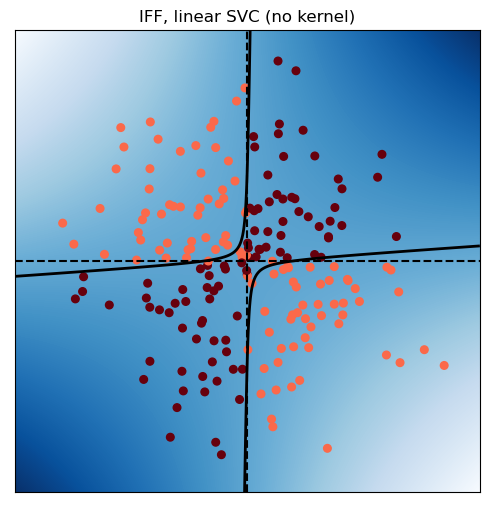

In [136]:
# Same rule as before
#y = (newX[:, 0] > 0) ^ (newX[:, 1] > 0)

y = X[:,0] * X[:,1] > 0
# Calling LinearSVC to build a model with no Kernel (dual=False)
# Not an option with SVC.
est = svm.LinearSVC(random_state=42,dual=False)
#  This functions trains the classifier
#  Tell the plotter it needs to use kernel f
plot_with_mapping(est, X, y, mapping=f);
plt.title("IFF, linear SVC (no kernel)");

This picture looks a lot like the picture we
drew using `SVC` and a kernel, but there are important
differences.  In this case we have two versions
of the training data: X (points in 2D space) and f(X)
(points in 3D space used in a polynomial model).  The scatterplot shows X.
The color values represent the class assigned by the trained
classifier to those points.

The classifier trains and predicts on f(X), so it has a 3D problem.
In a 3D problem, the linear separator is a plane.
In our problem, the SVM classifier needs to find a plane 
that separates the IFF points from the non-IFF points. 
Z (as used in the code) is the confidence value assigned
by the classifier; it is positive when the class of a point is positive
(the dark orange points), and
negative when the class is negative (the light orange points);
so the plane that exactly
separates the positive points from the negative
ones is the XY plane.  In other words, with our data X represented as f(X),
the XY plane is precisely the linear separator we're
looking for.

The thing that is hard to visualize in the 2D picture is how
the curve that separates the positive points from
the negative points comes about. In particular, how
is it created by a linear separator, in fact, a plane, in
fact, the xy-plane?  The answer is that the curved separator
depicts the points in the decision function Z
where Z = 0.  The decision function Z is actually a curved surface
and it so happens that its intersection with the xy-plane
is the curved black line in the picture above.

We show the decision surface in the next plot, which is 3D.
As we demonstrated in discussing the discussion of example
points in the poynomial kernel, for the IFF problem
the only feature that receives a non-zero weight
is the $\sqrt{2}xy$ feature, so the decision function
is essentially a plot of this function, possibly scaled differently.  The red points are positive Z;
the blue points are negative.   The further away from the origin
a point is, the higher its Z-value, positive or negative.

ax.azim=120
ax.elev=-140


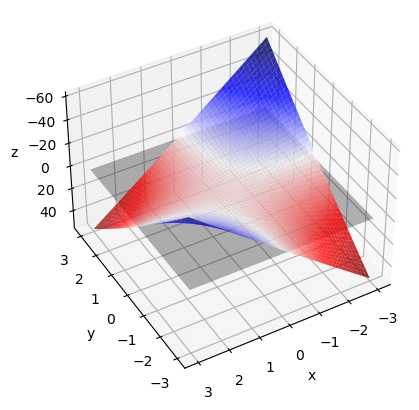

In [371]:
#def f(x, y):
#    return x*y

X0 = np.random.randn(200, 2)
y = X0[:,0] * X0[:,1] > 0
newX0 = f(X0)
est = svm.LinearSVC(random_state=42,dual=False)
est.fit(newX0,y)

bounds=3
xx, yy = np.meshgrid(np.linspace(-bounds, bounds, 500),
                     np.linspace(-bounds, bounds, 500))
X = np.c_[xx.ravel(), yy.ravel()]
newX = f(X)
Z = est.decision_function(newX).reshape(xx.shape)
    

#x = np.linspace(-3, 3, 500)
#y = np.linspace(-3, 3, 500)

#X, Y = np.meshgrid(x, y)
#Z = f(X, Y)
#Z2 = f2(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z,
             cmap='seismic', edgecolor='none',alpha=.8)

#print('ax.azim {}'.format(ax.azim))
#print('ax.elev {}'.format(ax.elev))
#ax.plot_surface(X, Y, Z2, rstride=10, cstride=10,
#                cmap='Greys_r', edgecolor='none',
#                alpha=.4)
#print(f'{ax.azim=}')
#print(f'{ax.elev=}')
ax.plot_surface(xx, yy, np.zeros(Z.shape), rstride=10, cstride=10,
                cmap='Greys_r', edgecolor='none',
                alpha=.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#Default vals
#ax.elev 30; ax.azim -60
elev,azim = 30, -60
#elev,azim = 25, 80
#ax.view_init(elev,azim)
#ax.view_init(-140, 60)  # From above
#ax.view_init(-140, 90)  # From ??
ax.view_init(-140, 120)  # From ??
print(f'{ax.azim=}')
print(f'{ax.elev=}')

The same surface at a different scale, drawn with the equation

$$
z = \sqrt{2} xy.
$$

ax.azim=-60
ax.elev=30
ax.azim=30
ax.elev=-180


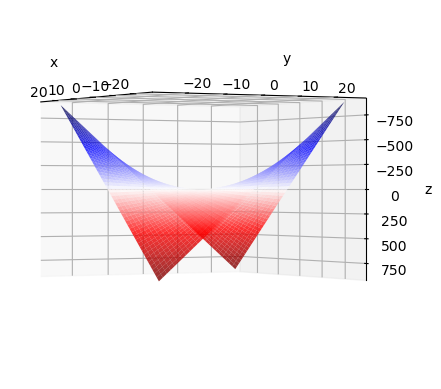

In [374]:
fig = plt.figure()
ax = plt.axes(projection='3d')
bounds=25
xx, yy = np.meshgrid(np.linspace(-bounds, bounds, 500),
                     np.linspace(-bounds, bounds, 500))
Z = np.sqrt(2) * xx * yy
ax.plot_surface(xx, yy, Z,
             cmap='seismic', edgecolor='none',alpha=.8)

#print('ax.azim {}'.format(ax.azim))
#print('ax.elev {}'.format(ax.elev))
#ax.plot_surface(X, Y, Z2, rstride=10, cstride=10,
#                cmap='Greys_r', edgecolor='none',
#                alpha=.4)
print(f'{ax.azim=}')
print(f'{ax.elev=}')
ax.plot_surface(xx, yy, np.zeros(Z.shape), rstride=10, cstride=10,
                cmap='Greys_r', edgecolor='none',
                alpha=.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(-180, 30)  # From ??
print(f'{ax.azim=}')
print(f'{ax.elev=}')

### The RBF Kernel

We'll illustrate a final kernel example with a different nonlinearly separable classification problem.
In this case, the rule is AND.  If both the x and y coordinates of a point are positive, the point
is in the positive class.

In this case another kernel, the RBF kernel, succeeds pretty well too.  So positive class points are
all and only those in the first quadrant:

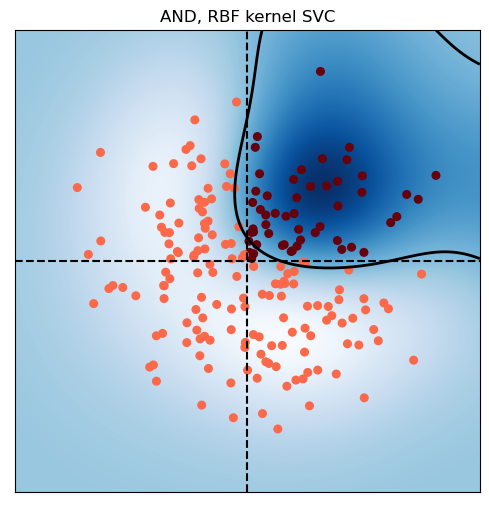

In [437]:
X0 = np.random.randn(200, 2)
y = (X0[:,0] > 0) & (X0[:,1] > 0)

#est = svm.LinearSVC(random_state=42,dual=False)

est = svm.SVC(kernel="rbf").fit(X0,y)

est.fit(X0,y)

plot_decision_function(est, X0, y)
plt.title("AND, RBF kernel SVC");

This is a **Gaussian kernel**:

$$
\text{K}(u, v) = \exp\left ( \,− \frac{\vert\negthinspace\vert\, d(u,\,v)\,\vert\negthinspace\vert ^{2}}{2\, l\,^{2}}\,\right ),
$$

where $d$ is Euclidean distance and $l$ (length scale) is a hyper-parameter that needs tuning,
say by a grid search.  It turns out that the corresponding feature
representation for this Kernel is infinite-dimensional.   The has to do with
the fact that exp function can be expressed as a (converging) infinite series. 
The terms in that infinite series can be viewed as the products of scalars
from two vectors.    Quite clearly,  the Kernel representation
is easier to compute with. So the bottom line on kernels 
is that they may make it feasible to compute with
feature representations with large numbers
of features, or even an infinite number of features.

### Summary

In this notebook we've seen all of the following things:

1. Support Vector Machines (SVMs) are Linear classifiers that seek to **maximize the margin**  between the
   nearest points and the separator.  Those nearest points are called the **support vectors**.
2. SVMs come with a highly useful feature, a scalar decision function that assigns to each data
   point $x$ a value that represents the confidence
   we can have in the classifier's classification of $x$.  Geometrically the decision score is proportional to the distance  from $x$ to the separator.
3. It is sometimes useful to transform data into a higher dimensional space.  The example we looked at (the IFF data) involved a classification problem that was not linearly separable in 2 dimensions but was easily separable once we transformed the data into 3 (or more) dimensions.  We demonstrated this in the section entitled **We find the IFF separator without the kernel trick** where we transformed our 2D IFF data into 3D and discovered the XY plane was the linear separator we needed.
4. Generally there is a computational cost for transforming data into higher dimensions.  Transforming, learning, and classifying all require extra numerical computations. 
5.  The **kernel trick** is a mathematical technique for avoiding or at least reducing the cost of extra dimensionality. It is particularly suitable for SVMs.  A **kernel** is a function K of untransformed vectors which computes the dot product of transformed vectors:

$$
K(v_{i},v_{j}) = f(v_{i}) \cdot f(v_{j})
$$

    The kernel function, then, works on the original untransformed vectors.  It can be computationally           simpler than  taking the dot product of the transformed vectors.
6.  Any SVM decision function can be  represented in two ways (the two learning problems are called **dual           problems**).  It can be learned in a transformed (usually higher-diemnsional) space, as we did in the ssection entitled
    **We find the IFF separator without the kernel trick**, resulting in a single weight vector $w$,
    with the dimensionality of the higher space, which can be used to enforce a non linear decision boundary.  Or, if there is a useful kernel K, as in the section entitled **Separating the IFF data with the kernel trick**,  the decision function can be represented in the original untransformed space as a set of weights for the support vectors. In this case all computations  for learning anf classifying happen in the original feature space using the kernel, but the same non linear decision function can be learned.

### Appendix:  Sometimes a feature mapping is a bad idea

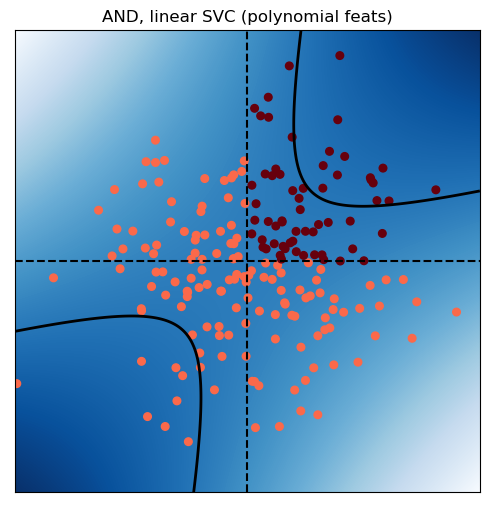

In [13]:
#AND  Just points in the first quadrant are positive.
X0 = np.random.randn(200, 2)
y = (X0[:,0] > 0) & (X0[:,1] > 0)

def f (X):
    # The polynomial feature mapping f from our example: "Using polynomial kernel on IFF problem"
    return np.concatenate([X[:,0:1]**2, np.sqrt(2) * X[:,0:1] * X[:,1:2], X[:,1:2]**2], axis=1)

#newX = f(X0)
#pf = PolynomialFeatures(degree=2)
#newX = pf.fit_transform(X)
est = svm.LinearSVC(random_state=42,dual=False)
#est.fit(newX,y)
plot_with_mapping(est, X0, y, mapping=f,sk_transformer=False);
plt.title("AND, linear SVC (polynomial feats)");

Here the feature mapping $f$ is truly unsuited to the problem:

$$
f: (x,y) \mapsto (x^{2}, \,\sqrt{2}\, x y, \, y^{2}),
$$

for example, maps both (-3,-4) and and (3,4) to the same point,
so it erases a distinction we need to make.


The features used by  scikit_learn's Polynomial transformer
with `interaction_only=True` don't throw away the original  $x$ and $y$ so
of course they do better:

$$
f:(x,y) \mapsto (1,x,xy,y)
$$

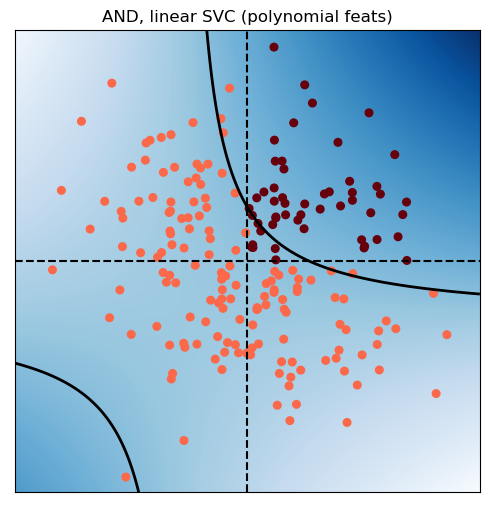

In [16]:
#AND  Just points in the first quadrant are positive.
X0 = np.random.randn(200, 2)
y = (X0[:,0] > 0) & (X0[:,1] > 0)

pf = PolynomialFeatures(interaction_only=True)
#newX = pf.fit_transform(X)
est = svm.LinearSVC(random_state=42,dual=False)
#est.fit(newX,y)
plot_with_mapping(est, X0, y, mapping=pf,sk_transformer=True);
plt.title("AND, linear SVC (polynomial feats)");

Ads you can see by the separator boundary in the lower left hand corner,
the classifier still hasn't quite got the idea.

Of course since the data are not linearly
separable, the learner with no feature mapping fails as well, perhaps less spectacularly
than the original $f$.

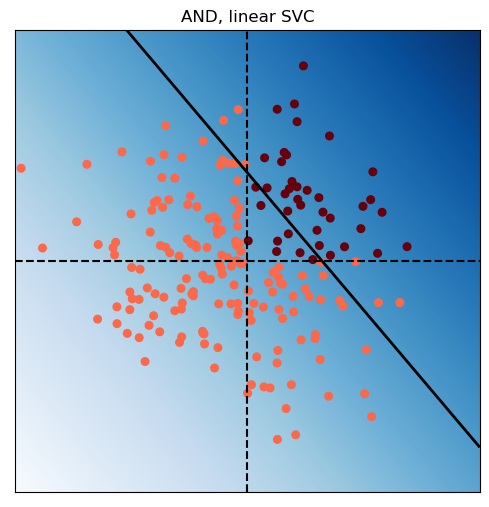

In [358]:
X0 = np.random.randn(200, 2)
y = (X0[:,0] > 0) & (X0[:,1] > 0)

est = svm.LinearSVC(random_state=42,dual=False)
est.fit(X0,y)

plot_decision_function(est, X0, y)
plt.title("AND, linear SVC");